# Seattle-Tacoma-Belleveu, WA, Air Quality - PM25 Analysis

## Project Overview

For this project, we will be using the Seattle-Tacoma-Belleveu, WA, Air Quality Index (AQI) 2019 dataset from the [EPA Repository](https://www.epa.gov/outdoor-air-quality-data/download-daily-data), and analysing the Particulate Matter (PM) 2.5 microns in diameter Pollution

For each pollutant an AQI value of 100 generally corresponds to an ambient air concentration that equals the level of the short-term national ambient air quality standard for protection of public health. AQI values at or below 100 are generally thought of as satisfactory. When AQI values are above 100, air quality is unhealthy: at first for certain sensitive groups of people, then for everyone as AQI values get higher.

The AQI is divided into six categories. Each category corresponds to a different level of health concern. Each category also has a specific color. Let's take a look at the table.

![AQI](./AQI_table.png)


For more detailed information about PM it can be found here https://www.epa.gov/pm-pollution/particulate-matter-pm-basics#PM

**Hypothesis:** Is the air quality, based on the PM2.5, on King County in Seattle, WA, good to live?

## Exploring the dataset

The fields of the dataset to be used are the following:

|Name	|	Measure	|Description|
|	----	|	-----	|-----------|
|	Date		|	| Date of measure |
|	AQI Value	| ug/m3	| Daily Air Quality Index |
|	State	|		| State of measure |
|	County	|		| County of measure |



In [1]:
# For this project we are using the pandas and matplotlib library
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SEA_PM25_2019.csv')

In [3]:
df.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2019,AQS,530330017,4,7.3,ug/m3 LC,30,NORTH BEND - NORTH BEND WAY,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,42660,"Seattle-Tacoma-Bellevue, WA",53,Washington,33,King,47.49022,-121.77278
1,01/02/2019,AQS,530330017,4,2.0,ug/m3 LC,8,NORTH BEND - NORTH BEND WAY,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,42660,"Seattle-Tacoma-Bellevue, WA",53,Washington,33,King,47.49022,-121.77278
2,01/03/2019,AQS,530330017,4,0.5,ug/m3 LC,2,NORTH BEND - NORTH BEND WAY,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,42660,"Seattle-Tacoma-Bellevue, WA",53,Washington,33,King,47.49022,-121.77278
3,01/04/2019,AQS,530330017,4,1.9,ug/m3 LC,8,NORTH BEND - NORTH BEND WAY,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,42660,"Seattle-Tacoma-Bellevue, WA",53,Washington,33,King,47.49022,-121.77278
4,01/05/2019,AQS,530330017,4,1.1,ug/m3 LC,5,NORTH BEND - NORTH BEND WAY,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,42660,"Seattle-Tacoma-Bellevue, WA",53,Washington,33,King,47.49022,-121.77278


In [4]:
df.shape

(7557, 20)

The dataset we have is since Jan 1, till Dec 31, 2019. There are 7557 rows and 20 columns on the dataset, but we don't need all of the columns.

## Data cleaning and preparation

We are going to use just some columns and not all of them, so we are dropping the ones we don't need and rename some columns for better handling. After that we look for any mising value.

In [5]:
# Specify the column for dropping
columns = ['Source', 'Site ID', 'POC', 'Daily Mean PM2.5 Concentration', 'UNITS', 'Site Name', 'DAILY_OBS_COUNT', 'PERCENT_COMPLETE', 'AQS_PARAMETER_CODE', 'AQS_PARAMETER_DESC', 'CBSA_CODE', 'CBSA_NAME', 'STATE_CODE', 'COUNTY_CODE', 'SITE_LATITUDE', 'SITE_LONGITUDE']
df.drop(columns, axis = 1, inplace = True)

# Renaming some columns
df.rename(columns = {'DAILY_AQI_VALUE':'AQI Value', 'STATE':'State', 'COUNTY':'County'}, inplace = True)

In [6]:
# Look if is there any missing value and drop the row if there is any.
df.dropna(inplace = True)
df.shape

(7557, 4)

We have left with just four columns which is great to work with, focusing only on what we need.

In [7]:
# We convert the object date to datetime and then sort by date.
df['Date'] = pd.to_datetime(df.Date)
df.sort_values( by = 'Date', inplace = True)
df.head()

,Date,AQI Value,State,County
0,2019-01-01,30,Washington,King
3543,2019-01-01,75,Washington,King
361,2019-01-01,87,Washington,King
3178,2019-01-01,66,Washington,King
6439,2019-01-01,67,Washington,Snohomish


In [8]:
df.tail()

,Date,AQI Value,State,County
1446,2019-12-31,5,Washington,King
1081,2019-12-31,14,Washington,King
723,2019-12-31,9,Washington,King
4723,2019-12-31,6,Washington,Pierce
7556,2019-12-31,14,Washington,Snohomish


## Statistics and Visualization

In [9]:
# Looking which county do we have
df.County.unique()

array(['King', 'Snohomish', 'Pierce'], dtype=object)

We will group by County and get some statistics of them to get an idea of the data we have.

In [10]:
df.groupby('County').describe()

AQI Value                                                    
              count       mean        std  min   25%   50%   75%    max
County                                                                 
King         4083.0  26.228508  14.602573  0.0  15.0  23.0  34.0   89.0
Pierce       2356.0  27.865874  17.590284  0.0  15.0  23.0  35.0  142.0
Snohomish    1118.0  27.161002  20.320640  0.0  12.0  20.0  38.0  114.0

### Let's make some box plot to compare with the AQI Value above

In [11]:
# We separate each County as dataframe to make the plots more easily
King = df[df["County"] == "King"]
Snohomish = df[df["County"] == "Snohomish"]
Pierce = df[df["County"] == "Pierce"]

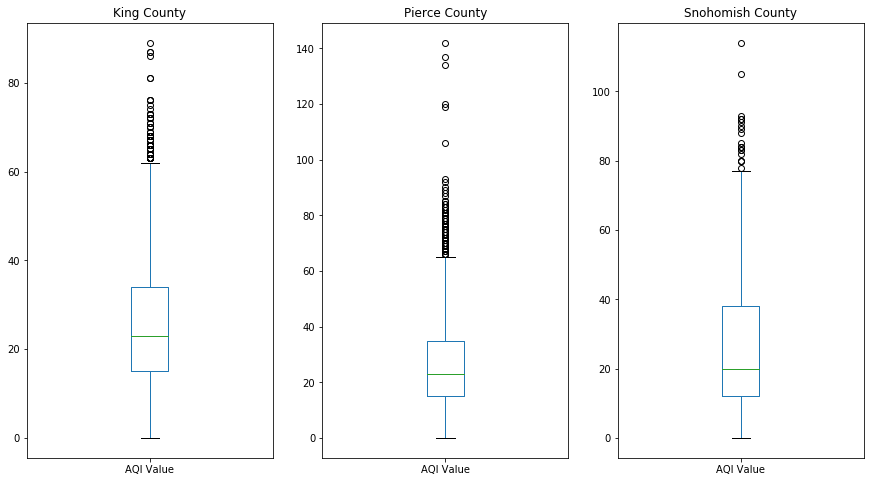

In [12]:
# Drawing the boxplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

King.plot.box(x='Date', y='AQI Value', ax=ax1, title='King County', legend=False, figsize=(15,8))
Pierce.plot.box(x='Date', y='AQI Value', ax=ax2,  title='Pierce County', legend=False, figsize=(15,8))
Snohomish.plot.box(x='Date', y='AQI Value', ax=ax3,  title='Snohomish County', legend=False, figsize=(15,8))

Looking about we have a comparison amongs the Counties. To understand how to read a box plot [take a look here](http://visualoop.com/media/2015/04/box_plot_anatomy.png)

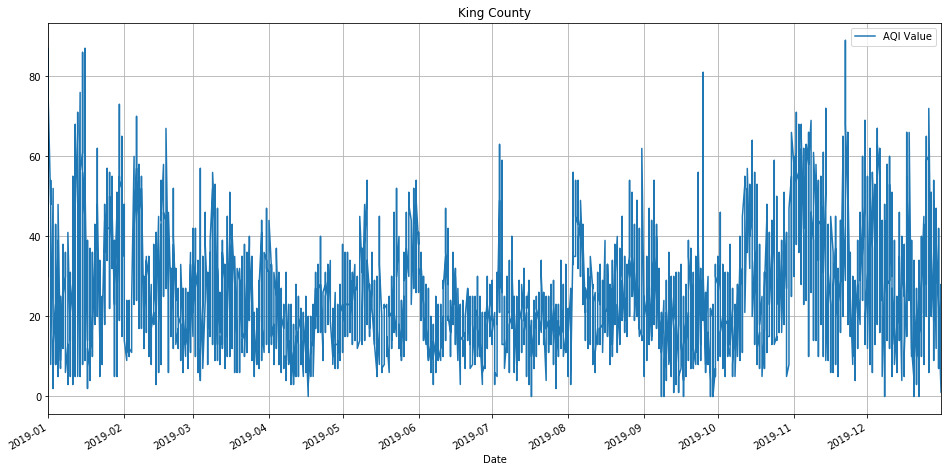

In [13]:
# Line plot for King county
line = King.plot.line(x='Date', y='AQI Value', title='King County', grid=True, figsize=(16,8))

#df.groupby('County').plot(x='Date', y='AQI Value', legend=False, grid=True, figsize=(15,8))

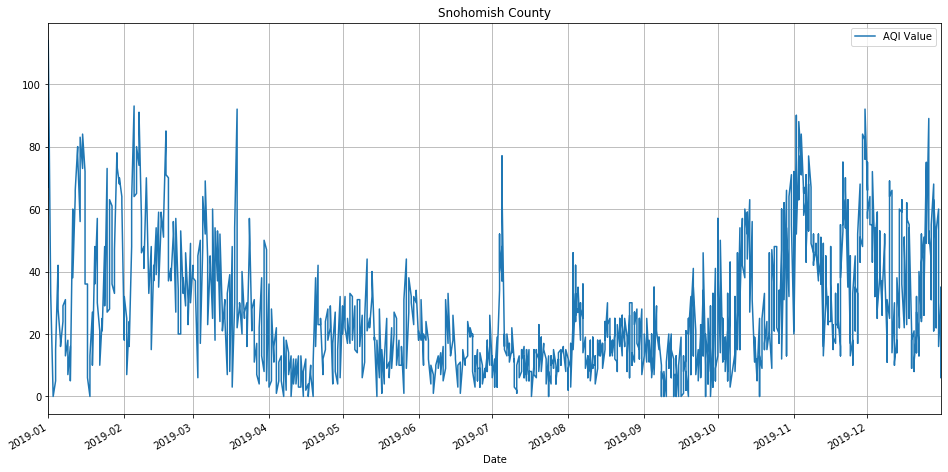

In [14]:
# Line plot for Snohomish county
Snohomish.plot.line(x='Date', y='AQI Value', title='Snohomish County', grid=True, figsize=(16,8))

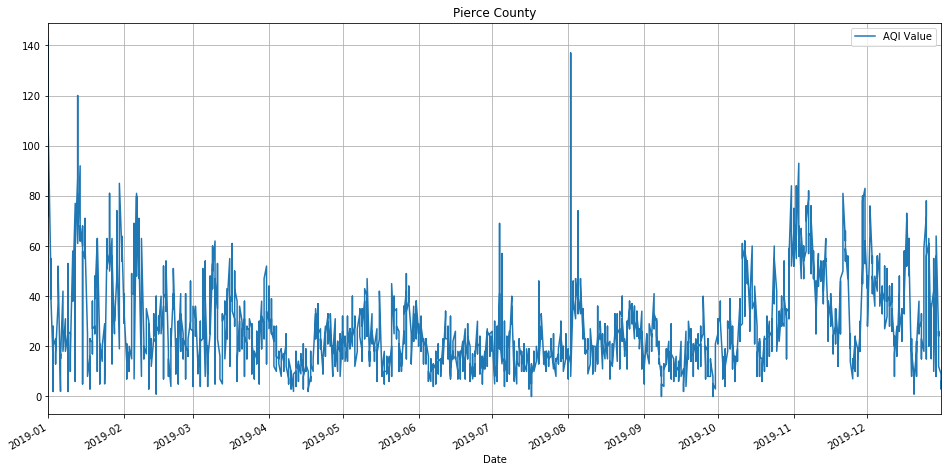

In [15]:
# Line plot for Pierce county
Pierce.plot.line(x='Date', y='AQI Value', title='Pierce County', grid=True, figsize=(16,8))

**Verifying the results:** Comparing the line graph, box plot and the values of min, max and mean for each County, we can say that the statistic obtained and the graph are corrects, because they show the same results.

# Conclusion

We see that the mean of the 3 counties are below 50 on the AQI value, which is good, and particularly the King county has the lowest mean, 75th percentile and max value among the counties studied in this project, so therefore we can say that the air quality on King county is good live.